<a href="https://colab.research.google.com/github/ksasi/EVA/blob/master/Phase2/Project1/Neural_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 18kB/s 
     |████████████████████████████████| 3.8MB 48.1MB/s 
     |████████████████████████████████| 450kB 61.6MB/s 
     |████████████████████████████████| 81kB 13.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.2 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exis

In [2]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
print("Tensorflow version: {}".format(tf.__version__))
print("Tensorflow Keras version: {}".format(keras.__version__))
print("numpy version: {}".format(np.__version__))

Tensorflow version: 2.1.0
Tensorflow Keras version: 2.2.4-tf
numpy version: 1.17.5


### Word-level one-hot encoding in numpy

In [0]:
# Generate a dictionary of tokens , where each token represents a word.

samples_list = ['I have a cute little dog as my pet.', 'My friend owns a cat which is also a good friend']

token_index = {}

for sample_item in samples_list:
  for word in sample_item.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
 

In [4]:
print(token_index)

{'I': 1, 'have': 2, 'a': 3, 'cute': 4, 'little': 5, 'dog': 6, 'as': 7, 'my': 8, 'pet.': 9, 'My': 10, 'friend': 11, 'owns': 12, 'cat': 13, 'which': 14, 'is': 15, 'also': 16, 'good': 17}


In [0]:
# Define maximum length for generating one-hot encoding. Also create a results matrix initialized to zeros. This will be updated to generate one-hot encoding.
max_length = 10

results = np.zeros(shape = (len(samples_list), max_length, len(token_index) + 1))

In [6]:
print(results.shape)

(2, 10, 18)


In [0]:
# Obtain the index for each word in any given sentence from the samples list. Update that index in the results matrix to a value of one. This then becomes one-hot encoding

for i, sample_item in enumerate(samples_list):
  for j, word in list(enumerate(sample_item.split()))[:max_length]:
    index = token_index.get(word)
    results[i,j, index] = 1

In [8]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 

### Character-level one-hot encoding in numpy

In [9]:
# Store all characters in English language in a variable
import string

samples_list = ['I have a cute little dog as my pet.', 'My friend owns a cat which is also a good friend']
characters = string.printable
print(characters)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [10]:
# Generate a dictionary of all characters

token_index = dict(zip(characters, range(1, len(characters) + 1)))
print(token_index)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}


In [11]:
# Define maximum length for generating one-hot encoding. Also create a results matrix initialized to zeros. This will be updated to generate one-hot encoding.
max_length = 50
result = np.zeros(shape = (len(samples_list), max_length, max(token_index.values()) + 1))
print(result.shape)

(2, 50, 101)


In [0]:
# Generate matrix with one-hot encoding ,by inserting 1 at the index corresponding to each character

for i, sample_item in enumerate(samples_list):
  for j, character in enumerate(sample_item):
    index = token_index.get(character)
    result[i, j, index] = 1


In [13]:
# Print the resultant one-hot encoded matrix

with np.printoptions(threshold = np.inf):
  print(result)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0

### Word-level one-hot encoding using tf.keras

In [14]:
# Instantiate a Tokenizer object in tf.keras, fit it on the text samples and then generate one-hot results via text sequences

from keras.preprocessing.text import Tokenizer

samples_list = ['I have a cute little dog as my pet.', 'My friend owns a cat which is also a good friend']

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples_list)

sequences = tokenizer.texts_to_sequences(samples_list)

one_hot_results = tokenizer.texts_to_matrix(samples_list, mode = 'binary')

word_index = tokenizer.word_index
print('Found {} unique tokens'.format(len(word_index)))

Found 16 unique tokens


Using TensorFlow backend.


In [15]:
print(one_hot_results)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


### Word-level one-hot encoding with hashing trick

In [0]:
# Define max_length and dimentionality variables to use them define one-hot encoded matrix as well as the hash value

samples_list = ['I have a cute little dog as my pet.', 'My friend owns a cat which is also a good friend']

dimentionality = 2000
max_length = 10

In [0]:
results_hash = np.zeros(shape = (len(samples_list), max_length, dimentionality))

In [18]:
print(results_hash.shape)

(2, 10, 2000)


In [0]:
# Generate hash value and then use it to generate one-hot encoded matrix
for i, sample_item in enumerate(samples_list):
  for j, word in list(enumerate(sample_item.split()))[:max_length]:
    index = abs(hash(word)) % dimentionality
    results_hash[i, j, index] = 1

In [20]:
with np.printoptions(threshold = np.inf):
  print(results_hash)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

### Using word embeddings and training a neural network

In [21]:
# Download IMDB data

!wget --no-check-certificate http://mng.bz/0tIo

--2020-01-23 16:00:27--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-01-23 16:00:27--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-01-23 16:00:27--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.177.93
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.177.93|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  33.9MB/s    in 1.7s    

2020-01-23 16:00:29 (33.9 MB/s) - ‘0tIo’ saved [60711700/60711700]

In [22]:
# uncompress IMDB data

!unzip "0tIo"

Archive:  0tIo
   creating: aclImdb/
  inflating: aclImdb/.DS_Store       
   creating: __MACOSX/
   creating: __MACOSX/aclImdb/
  inflating: __MACOSX/aclImdb/._.DS_Store  
   creating: aclImdb/test/
  inflating: aclImdb/test/.DS_Store  
   creating: __MACOSX/aclImdb/test/
  inflating: __MACOSX/aclImdb/test/._.DS_Store  
   creating: aclImdb/test/neg/
  inflating: aclImdb/test/neg/0_2.txt  
   creating: __MACOSX/aclImdb/test/neg/
  inflating: __MACOSX/aclImdb/test/neg/._0_2.txt  
  inflating: aclImdb/test/neg/10000_4.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10000_4.txt  
  inflating: aclImdb/test/neg/10001_1.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10001_1.txt  
  inflating: aclImdb/test/neg/10002_3.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10002_3.txt  
  inflating: aclImdb/test/neg/10003_3.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10003_3.txt  
  inflating: aclImdb/test/neg/10004_2.txt  
  inflating: __MACOSX/aclImdb/test/neg/._10004_2.txt  
  inflating: aclImdb

In [0]:
# Setup directories

import os
imdb_base_dir = "./aclImdb"
train_dir = os.path.join(imdb_base_dir, 'train')
test_dir = os.path.join(imdb_base_dir, 'test')

In [0]:
# Process the labels and text files and store them in lists

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      file = open(os.path.join(dir_name, fname))
      texts.append(file.read())
      file.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [26]:
# Tokenize and then pad the sequences so that all the examples are of same shape

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 8000
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found {} unique tokens'.format(word_index))

data = pad_sequences(sequences, maxlen = maxlen)

labels = np.array(labels)

print('Shape of data tensor: {}'.format(data.shape))
print('Shape of label tensor: {}'.format(labels.shape))

Found {'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'who': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'out': 43, 'if': 44, 'has': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'more': 50, 'when': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'she': 56, 'even': 57, 'my': 58, 'would': 59, 'which': 60, 'only': 61, 'story': 62, 'really': 63, 'see': 64, 'their': 65, 'had': 66, 'can': 67, 'were': 68, 'me': 69, 'well': 70, 'than': 71, 'we': 72, 'much': 73, 'been': 74, 'bad': 75, 'get': 76, 'will': 77, 'do': 78, 'also': 79, 'into': 80, 'people': 81, 'other': 82, 'first': 83, 'great': 84, 'because': 85, 'how': 86, 'him': 87, 'most': 88, "d

In [0]:
# Shuffle the labels and training data so that train and validation split can be done later

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
# Split into train and validation examples

x_train = data[:training_samples]
y_train = labels[:training_samples]

In [0]:
# Split into train and validation examples

x_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [31]:
# Download precomputed embeddings from 2014 English Wikipedia. The file is named "glove.6B.zip"

!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-01-23 16:21:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-23 16:21:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-23 16:21:29--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [32]:
!unzip glove.6B.zip 

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [33]:
!ls -lrt

total 3098436
-rw-rw-r-- 1 root root  347116733 Aug  4  2014 glove.6B.100d.txt
-rw-rw-r-- 1 root root  693432828 Aug  4  2014 glove.6B.200d.txt
-rw-rw-r-- 1 root root  171350079 Aug  4  2014 glove.6B.50d.txt
-rw-rw-r-- 1 root root 1037962819 Aug 27  2014 glove.6B.300d.txt
-rw-r--r-- 1 root root  862182613 Oct 25  2015 glove.6B.zip
drwxr-xr-x 4 root root       4096 Nov 18  2017 aclImdb
drwxrwxr-x 3 root root       4096 Nov 18  2017 __MACOSX
-rw-r--r-- 1 root root   60711700 Nov 18  2017 0tIo
drwxr-xr-x 1 root root       4096 Jan 13 16:38 sample_data


In [0]:
# Parse embeddings file

embedding_index = {}
glove_file = open('glove.6B.100d.txt')
for gline in glove_file:
  values = gline.split()
  word = values[0]
  coefs = np.array(values[1:], dtype = 'float32')
  embedding_index[word] = coefs
glove_file.close()

In [35]:
print('Found {} word vectors: '.format(len(embedding_index)))

Found 400000 word vectors: 


In [0]:
# Preparing GloVe word-embedding matrix

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [75]:
# Create the model - added more dense layers and also added dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Embedding, Flatten, Dense, Dropout

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

In [0]:
# Load pretrained word embeddings into embedding layer and 
# Setting this layer as trainable is resulting in better validation accuracy 

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [0]:
# Compile the model

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [78]:
# Train and evaluate the model for 30 epochs

train_history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_valid, y_valid), verbose =1)

Train on 8000 samples, validate on 10000 samples
Epoch 1/30
8000/8000 [==============================] - 3s 377us/sample - loss: 0.7319 - acc: 0.5079 - val_loss: 0.6907 - val_acc: 0.5221
Epoch 2/30
8000/8000 [==============================] - 3s 321us/sample - loss: 0.6837 - acc: 0.5514 - val_loss: 0.6526 - val_acc: 0.6596
Epoch 3/30
8000/8000 [==============================] - 3s 323us/sample - loss: 0.6457 - acc: 0.6186 - val_loss: 0.5883 - val_acc: 0.6926
Epoch 4/30
8000/8000 [==============================] - 3s 318us/sample - loss: 0.5960 - acc: 0.6637 - val_loss: 0.5825 - val_acc: 0.6886
Epoch 5/30
8000/8000 [==============================] - 2s 309us/sample - loss: 0.5515 - acc: 0.7132 - val_loss: 0.5342 - val_acc: 0.7374
Epoch 6/30
8000/8000 [==============================] - 3s 313us/sample - loss: 0.5046 - acc: 0.7455 - val_loss: 0.4905 - val_acc: 0.7666
Epoch 7/30
8000/8000 [==============================] - 3s 316us/sample - loss: 0.4565 - acc: 0.7794 - val_loss: 0.4819 - v

In [0]:
# Plotting the results

import matplotlib.pyplot as plt

train_accuracy = train_history.history['acc']
validation_accuracy = train_history.history['val_acc']
train_loss = train_history.history['loss']
validation_loss = train_history.history['val_loss']


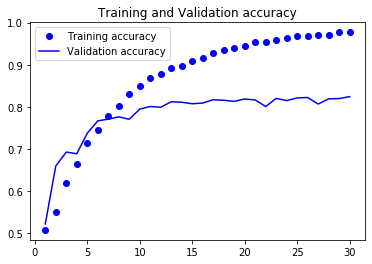

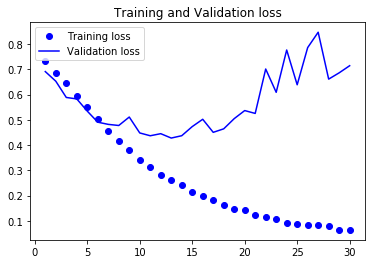

In [82]:
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### **References & Attributions:**

*   DEEP LEARNING with Python by François Chollet (http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf)
*   GloVe: Global Vectors for Word Representation (https://nlp.stanford.edu/projects/glove/)

*   Tensorflow 2.1 (https://www.tensorflow.org/api_docs/python/)


*Disclaimer: The contents of this notebook are used for educational purposes i.e. for learning and research.*
